<h1 style='color:#00868b'>Read, balance and clean dataset<span class="tocSkip"></span></h1>

This notebook reads in the data, balances it, cleans it and then saves it to a csv file. This csv can then be used in a separate notebook to train a model. This notebook also allows the user to tweak the balancing and cleaning as they see fit.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Read file**

In [20]:
df = pd.read_csv("../../../complaints-2020-01-22_08_24.csv", encoding="utf-8")

**Select columns to keep**

Add your columns here.

In [21]:
df_balanced1 = df.loc[:, ('Product', 'Consumer complaint narrative', 'Issue')]

**Remove columns with the least complaints**

In [22]:
"""df_balanced1 = df_selected

df_balanced1 = df_balanced1[df_balanced1["Product"] != "Virtual currency"]
df_balanced1 = df_balanced1[df_balanced1["Product"] != "Other financial service"]
df_balanced1 = df_balanced1[df_balanced1["Product"] != "Prepaid card"]
df_balanced1 = df_balanced1[df_balanced1["Product"] != "Money transfers"]
df_balanced1 = df_balanced1[df_balanced1["Product"] != "Payday loan"]"""

'df_balanced1 = df_selected\n\ndf_balanced1 = df_balanced1[df_balanced1["Product"] != "Virtual currency"]\ndf_balanced1 = df_balanced1[df_balanced1["Product"] != "Other financial service"]\ndf_balanced1 = df_balanced1[df_balanced1["Product"] != "Prepaid card"]\ndf_balanced1 = df_balanced1[df_balanced1["Product"] != "Money transfers"]\ndf_balanced1 = df_balanced1[df_balanced1["Product"] != "Payday loan"]'

**Make a copy and iteratively drop the products with the most complaints, adding a random sample % of them back afterwards**

In [23]:
df_balanced2 = df_balanced1.copy()
df_balanced2.shape

(485701, 3)

In [24]:
indexNames = df_balanced2[df_balanced2["Product"] == "Mortgage"].index
df_balanced2.drop(indexNames, inplace=True)
indexNames = df_balanced2[df_balanced2["Product"] == "Debt collection"].index
df_balanced2.drop(indexNames, inplace=True)
indexNames = df_balanced2[df_balanced2["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_balanced2.drop(indexNames, inplace=True)

In [25]:
df_balanced2 = df_balanced2.append(df_balanced1.loc[df_balanced1["Product"] == 'Mortgage'].sample(frac=0.5))
df_balanced2 = df_balanced2.append(df_balanced1.loc[df_balanced1["Product"] == 'Debt collection'].sample(frac=0.4))
df_balanced2 = df_balanced2.append(df_balanced1.loc[df_balanced1["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.3))

In [26]:
df_balanced3 = df_balanced2.copy()
df_balanced2.shape

(292476, 3)

Text(0,0.5,'categories')

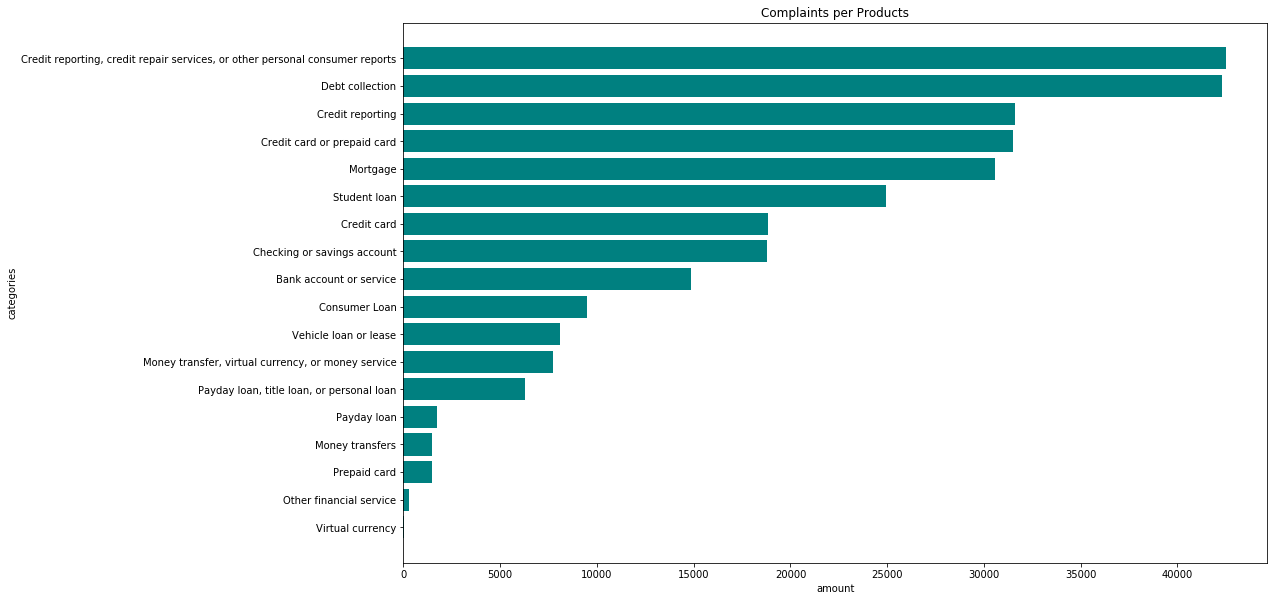

In [27]:
diff_products = df_balanced3.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

In [28]:
indexNames = df_balanced3[df_balanced3["Product"] == "Credit reporting, credit repair services, or other personal consumer reports"].index
df_balanced3.drop(indexNames, inplace=True)
indexNames = df_balanced3[df_balanced3["Product"] == "Debt collection"].index
df_balanced3.drop(indexNames, inplace=True)
indexNames = df_balanced3[df_balanced3["Product"] == "Credit reporting"].index
df_balanced3.drop(indexNames, inplace=True)
indexNames = df_balanced3[df_balanced3["Product"] == "Credit card or prepaid card"].index
df_balanced3.drop(indexNames, inplace=True)
indexNames = df_balanced3[df_balanced3["Product"] == "Mortgage"].index
df_balanced3.drop(indexNames, inplace=True)
indexNames = df_balanced3[df_balanced3["Product"] == "Student loan"].index
df_balanced3.drop(indexNames, inplace=True)


In [29]:
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Credit reporting, credit repair services, or other personal consumer reports'].sample(frac=0.5))
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Debt collection'].sample(frac=0.5))
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Credit reporting'].sample(frac=0.6))
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Credit card or prepaid card'].sample(frac=0.6))
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Mortgage'].sample(frac=0.6))
df_balanced3 = df_balanced3.append(df_balanced2.loc[df_balanced2["Product"] == 'Student loan'].sample(frac=0.85))

In [30]:
df_balanced3.shape

(208875, 3)

Text(0,0.5,'categories')

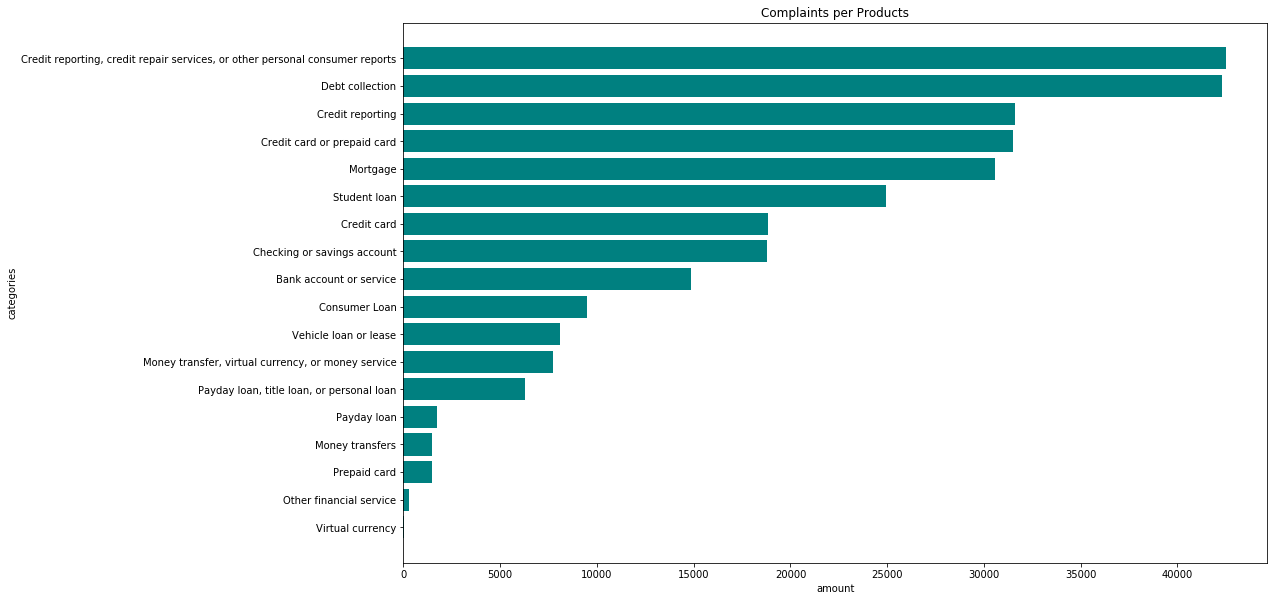

In [31]:
diff_products = df_balanced2.groupby("Product")["Product"].count().sort_values(ascending=False)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_products.index,diff_products,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Products')
plt.xlabel('amount')
plt.ylabel('categories')

Text(0,0.5,'categories')

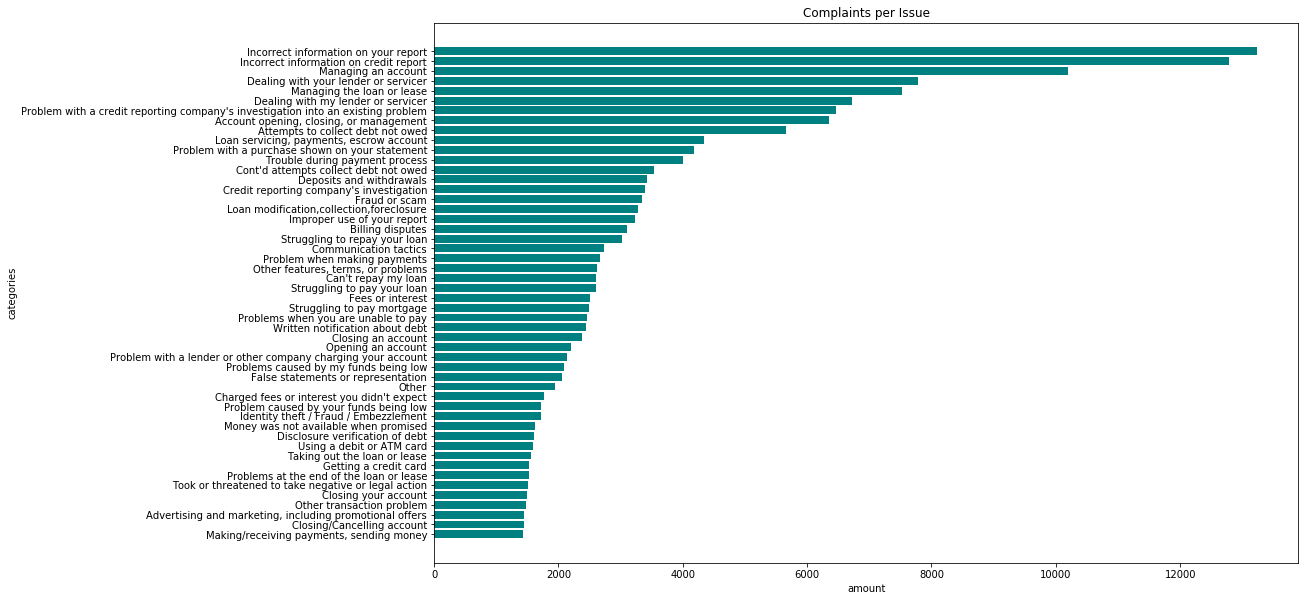

In [32]:
diff_issues = df_balanced3.groupby("Issue")["Issue"].count().sort_values(ascending=False)
diff_issues = diff_issues[:50]
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30,15]
ax = fig.add_axes([0,0,0.4,0.5])

ax.barh(diff_issues.index,diff_issues,color='teal')
ax.invert_yaxis()
plt.title('Complaints per Issue')
plt.xlabel('amount')
plt.ylabel('categories')

**Data cleaning & lemmatization**

In [33]:
import re
import string

# Remove urls
def clean_url(complaint):
    # to do: more regex url garbage matching
    complaint = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    complaint = re.sub('https? ?: ?// ?(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', complaint)
    return complaint

# Remove punctuation from complaint
def clean_punctuation(complaint):
    complaint = re.sub('[%s]' % re.escape(string.punctuation), '', complaint)
    return complaint

# Remove non-sensical characters from complaint
def clean_nonsense(complaint):
    complaint = re.sub('[''""...]', '', complaint)
    complaint = re.sub('\n', '', complaint)
    return complaint

# Remove censored words from complaint
def clean_censored(complaint):
    complaint = re.sub('[XXXX]', '', complaint)
    return complaint

# Turn everything into lowercase
def clean_lowercase(complaint):
    complaint = complaint.lower()
    return complaint

# Remove numbers from complaint
def clean_numbers(complaint):
    complaint = re.sub("\d+", '', complaint)
    return complaint

In [34]:
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_url)
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_punctuation)
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_nonsense)
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_censored)
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_lowercase)
df_balanced3["Consumer complaint narrative"] = df_balanced3["Consumer complaint narrative"].apply(clean_numbers)

In [35]:
print(df_balanced3.shape)
df_balanced3.head()

(208875, 3)


,Product,Consumer complaint narrative,Issue
9,"Payday loan, title loan, or personal loan",they would not let me pay my loan off days be...,Problem with the payoff process at the end of ...
12,"Payday loan, title loan, or personal loan",service finance are liars and are charging me ...,Charged fees or interest you didn't expect
27,Checking or savings account,over draft fees due to fraudulent charges subm...,Problem caused by your funds being low
38,Vehicle loan or lease,on i signed a car loan agreement to finance m...,Problems at the end of the loan or lease
44,"Money transfer, virtual currency, or money ser...",we hired and debt collection to handle co...,Fraud or scam


In [36]:
# pickle for later use
df_balanced3.to_pickle("corpus_cleaned_twice.pkl")

**Run the lemmatization.py script in Pycharm to lemmatize the balanced & cleaned dataset.**

This will produce a csv, <code>corpus_balanced3_cleaned_lemmatized.csv</code> that can be read into any notebook used for training using the code below:

<code> my_df = pd.read_csv("corpus_balanced3_cleaned_lemmatized.csv", encoding="utf-8")</code>

In [32]:
my_df = pd.read_csv("corpus_balanced3_cleaned_lemmatized.csv", encoding="utf-8")

In [33]:
my_df.head()

Product                              0
Consumer complaint narrative    126485
dtype: int64

**Train in your separate notebook**

Use <code>RandomForest_run_006.ipynb</code> as an example for structure. Make a copy, rename is and replace what you need. [notebook](RandomForest_run_006.ipynb)